# Guided Project: Predicting Car Prices
### Practice the machine learning workflow using k-nearest neighbors to predict car prices.

## 1: Introduction To The Data Set

In this course, we explored the fundamentals of machine learning using the k-nearest neighbors algorithm. In this guided project, you'll practice the machine learning workflow you've learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). Here's a preview of the data set:

| symboling | normalized_losses | make        | fuel_type | aspiration | num_doors | body_style  | drive_wheels | engine_location | wheel_base | length | width | height | curb_weight | engine_type | num_cylinders | engine_size | fuel_system | bore | stroke | compression_ratio | horsepower | peak_rpm | city_mpg | highway_mpg | price |
|-----------|-------------------|-------------|-----------|------------|-----------|-------------|--------------|-----------------|------------|--------|-------|--------|-------------|-------------|---------------|-------------|-------------|------|--------|-------------------|------------|----------|----------|-------------|-------|
| 3         | ?                 | alfa-romero | gas       | std        | two       | convertible | rwd          | front           | 88.6       | 168.8  | 64.1  | 48.8   | 2548        | dohc        | four          | 130         | mpfi        | 3.47 | 2.68   | 9.0               | 111        | 5000     | 21       | 27          | 13495 |
| 3         | ?                 | alfa-romero | gas       | std        | two       | convertible | rwd          | front           | 88.6       | 168.8  | 64.1  | 48.8   | 2548        | dohc        | four          | 130         | mpfi        | 3.47 | 2.68   | 9.0               | 111        | 5000     | 21       | 27          | 16500 |
| 1         | ?                 | alfa-romero | gas       | std        | two       | hatchback   | rwd          | front           | 94.5       | 171.2  | 65.5  | 52.4   | 2823        | ohcv        | six           | 152         | mpfi        | 2.68 | 3.47   | 9.0               | 154        | 5000     | 19       | 26          | 16500 |
| 2         | 164               | audi        | gas       | std        | four      | sedan       | fwd          | front           | 99.8       | 176.6  | 66.2  | 54.3   | 2337        | ohc         | four          | 109         | mpfi        | 3.19 | 3.40   | 10.0              | 102        | 5500     | 24       | 30          | 13950 |
| 2         | 164               | audi        | gas       | std        | four      | sedan       | 4wd          | front           | 99.4       | 176.6  | 66.4  | 54.3   | 2824        | ohc         |               |             |             |      |        |                   |            |          |          |             |       |

You can find the solutions for this guided project [here](https://github.com/dataquestio/solutions/blob/master/Mission155Solutions.ipynb).

#### Instructions:
- Read imports-85.data into a dataframe named cars.
- You'll notice that the column names are missing from the dataframe. Use the column names from the data set's documentation to add the column names when reading the file into a dataframe.
- Determine which columns are numeric and can be used as features and which column is the target column.
- Display the first few rows of the dataframe and make sure it looks like the data set preview.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read .data file
cars = pd.read_table('data/imports-85.data', delimiter=",", header=None)
cars.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# add header from documentation
header = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels',
 'engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders',
 'engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg',
 'highway_mpg','price']
cars.columns = header
cars.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [4]:
# determine numeric features and target
target = cars.price
numeric_cols = ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 
                'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']
cars[numeric_cols].head()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


## 2: Data Cleaning

As we learned in this course, we usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the `normalized-losses` column contains missing values represented using `"?"`. Let's replace these values and look for the presence of missing values in other numeric columns. Let's also normalize the values in all numeric columns.

#### Instructions:
- Return the number of rows that have a missing value for the normalized-losses column. Determine how you should handle this column. You could:
    - Replace the missing values using the values from similar cars.
    - Drop the rows entirely (especially if other columns in those rows have missing values).
    - Drop the column entirely.
- Explore the missing value counts for the other numeric columns and handle any missing values.
- Of the columns you decided to keep, normalize the numeric ones so all values range from 0 to 1.

In [5]:
# Replace ?'s with NaNs
cars.replace('?', np.NaN, inplace=True)
cars.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


In [6]:
# print shape
print(cars.shape)

# Count NaNs
cars.isnull().sum()

(205, 26)


symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [7]:
# drop entire 'normalized_losses" column (too many NaNs)
cars.drop('normalized_losses', axis=1, inplace=True)

# drop rows where other values are missing
cars.dropna(inplace=True)

# print new shape, null counts, df head
print(cars.shape)
print(cars.isnull().sum())
cars.head(10)

(193, 25)
symboling            0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64


,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [8]:
# check datatypes
print(cars[numeric_cols].dtypes)
print('\n price dtype: ',cars.price.dtype)

wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
dtype: object

 price dtype:  object


In [9]:
# change data types
cars.bore = cars.bore.astype('float64')
cars.stroke = cars.stroke.astype('float64')
cars.horsepower = cars.horsepower.astype('int64')
cars.peak_rpm = cars.peak_rpm.astype('int64')
cars.price = cars.price.astype('int64')

# recheck
print(cars[numeric_cols].dtypes)
print('\nprice dtype: ',cars.price.dtype)

wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
dtype: object

price dtype:  int64


In [10]:
# normalize numeric columns creating new matrix X
from sklearn.preprocessing import Normalizer
X = Normalizer().fit_transform(cars[numeric_cols]) # (numpy.ndarray)

# view as dataframe
X = pd.DataFrame(X, columns=numeric_cols)

# add price column back on
price = cars.price.reset_index(drop=True)
X = pd.concat([X, price], axis=1)
X

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.015770,0.030045,0.011409,0.008686,0.453516,0.023139,0.000618,0.000477,0.001602,0.019757,0.889944,0.003738,0.004806,13495
1,0.015770,0.030045,0.011409,0.008686,0.453516,0.023139,0.000618,0.000477,0.001602,0.019757,0.889944,0.003738,0.004806,16500
2,0.016435,0.029774,0.011391,0.009113,0.490956,0.026435,0.000466,0.000603,0.001565,0.026783,0.869564,0.003304,0.004522,16500
3,0.016683,0.029522,0.011067,0.009077,0.390674,0.018221,0.000533,0.000568,0.001672,0.017051,0.919430,0.004012,0.005015,13950
4,0.016060,0.028534,0.010728,0.008773,0.456280,0.021974,0.000515,0.000549,0.001293,0.018581,0.888647,0.002908,0.003555,17450
5,0.016493,0.029301,0.010957,0.008775,0.414308,0.022475,0.000527,0.000562,0.001405,0.018179,0.908932,0.003140,0.004132,15250
6,0.017068,0.031086,0.011518,0.008985,0.458790,0.021939,0.000515,0.000548,0.001371,0.017745,0.887252,0.003065,0.004033,17710
7,0.016928,0.030831,0.011424,0.008912,0.472629,0.021759,0.000510,0.000544,0.001360,0.017600,0.879980,0.003040,0.004000,18920
8,0.016756,0.030519,0.011308,0.008853,0.488750,0.020747,0.000496,0.000538,0.001315,0.022173,0.871070,0.002692,0.003168,23875
9,0.016113,0.028149,0.010317,0.008645,0.381323,0.017195,0.000557,0.000446,0.001401,0.016081,0.923454,0.003662,0.004617,16430


## 3: Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

#### Instructions:

- Create a function, named knn_train_test() that encapsulates the training and simple validation process. This function should have 2 parameters -- column name as a string and the dataframe object.
    - If a non-numeric column is passed in (or one not in the dataframe), throw an error with a helpful message.
    - This function should split the data set into a training and test set.
    - Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
    - Finally, it should calculate the RMSE and return that value.
- Use this function to train and test univariate models using the different numeric columns in the data set. Which column performed the best using the default k value?
- Modify the knn_train_test() function you wrote to accept a parameter for the k value.
    - Update the function logic to use this parameter.
    - For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). For each k value, plot a histogram of the RMSE values.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(col_name, df):
    if col_name not in numeric_cols:
        print("Not a numeric column")
    else:
        X_train, X_test, y_train, y_test = train_test_split(df[col_name], df.price, test_size=0.25, random_state=42)
        model = KNeighborsRegressor()
        model.fit(X_train.values.reshape([len(X_train), 1]), y_train)# reshape to (n,1)
        predictions = model.predict(X_test.values.reshape([len(X_test), 1]))
        rmse = np.abs(mean_squared_error(predictions, y_test)) ** (1/2)
        return rmse

In [12]:
univariate_rmses = {}
for f in numeric_cols:
    univariate_rmses[f] = knn_train_test(f, X)
univariate_rmses    

{'bore': 8940.497850813912,
 'city_mpg': 4018.1350294759936,
 'compression_ratio': 8442.6972284589574,
 'curb_weight': 7306.7237970605283,
 'engine_size': 4145.4367392572376,
 'height': 8693.6411362394247,
 'highway_mpg': 4656.3592130350426,
 'horsepower': 4977.6529098992596,
 'length': 8593.7997298954451,
 'peak_rpm': 7307.5782447024803,
 'stroke': 9455.1404557715232,
 'wheel_base': 9687.5253351926785,
 'width': 10405.314120924078}

`city_mpg` is the numeric feature with the lowest individual RMSE

In [13]:
def knn_train_test(col_name, df, k):
    if col_name not in numeric_cols:
        print("Not a numeric column")
    else:
        X_train, X_test, y_train, y_test = train_test_split(df[col_name], df.price, test_size=0.25, random_state=42)
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train.values.reshape([len(X_train), 1]), y_train)# reshape to (n,1)
        predictions = model.predict(X_test.values.reshape([len(X_test), 1]))
        rmse = np.abs(mean_squared_error(predictions, y_test)) ** (1/2)
        return rmse

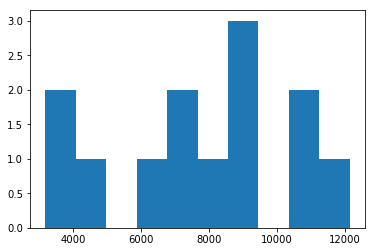

7764.37003209


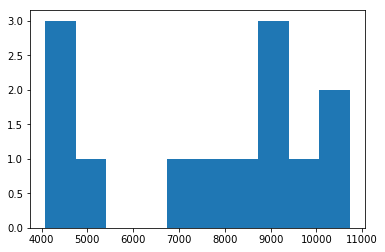

7512.97403039


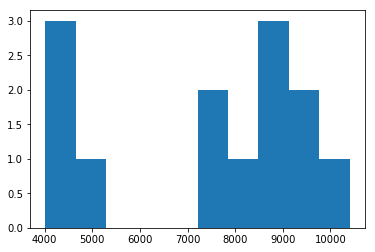

7433.11552236


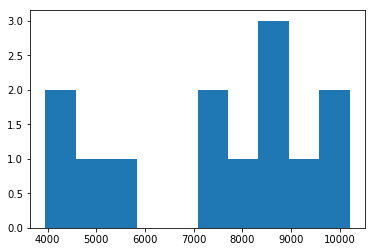

7421.00781041


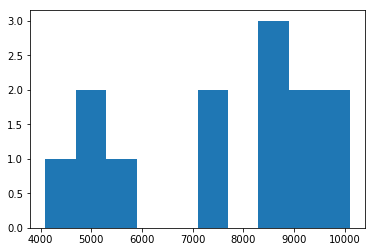

7546.34174825


In [14]:
k_vals = [1,3,5,7,9]

for k in k_vals:
    rmses = []
    for f in numeric_cols:    
        rmses.append(knn_train_test(f, X, k))
    plt.hist(rmses)
    plt.show()   
    print(np.mean(rmses))

## 4: Multivariate Model

Let's modify the `knn_train_test()` function we wrote in the last step to work with multiple columns.

#### Instructions:
- Modify the knn_train_test() function to accept a list of column names (instead of just a string). Modify the rest of the function logic to use this parameter:
    - Ensure that each column is numeric and exists in the dataframe (or throw an error with a helpful error message).
    - Instead of using just a single column for train and test, use all of the columns passed in.
- Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the best k value (lowest RMSE) from the previous step.
- Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the best k value (lowest RMSE) from the previous step.
- Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the best k value (lowest RMSE) from the previous step.
- Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the best k value (lowest RMSE) from the previous step.
- Display all of the RMSE values.

In [15]:
def knn_train_test(col_list, df, k):    
    if set(col_list).issubset(numeric_cols): # check if list is subset of another list
        X_train, X_test, y_train, y_test = train_test_split(df[col_list], df.price, test_size=0.25, random_state=42)
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)# reshape to (n,1)
        predictions = model.predict(X_test)
        rmse = np.abs(mean_squared_error(predictions, y_test)) ** (1/2)
        return rmse
    else:
        print("feature(s) in col_list are not numeric!")

In [16]:
knn_train_test(numeric_cols, X, 5)

6260.162703303864

In [17]:
top_features = []
for i in range(5):
    min_feature = min(univariate_rmses, key=univariate_rmses.get)
    print(min_feature, univariate_rmses[min_feature])
    univariate_rmses.pop(min_feature)
    top_features.append(min_feature)
top_features    

city_mpg 4018.13502948
engine_size 4145.43673926
highway_mpg 4656.35921304
horsepower 4977.6529099
curb_weight 7306.72379706


['city_mpg', 'engine_size', 'highway_mpg', 'horsepower', 'curb_weight']

In [26]:
for f in range(2,6): # 2-5 features
    print(f, knn_train_test(top_features[:f], X, 7)) # with 7 as previously best K value

2 4130.11702797
3 4207.726391
4 4449.15745727
5 6357.32621071


## 5: Hyperparameter Tuning

Let's now optimize the model that performed the best in the previous step.

#### Instructions:
- For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.
- Which k value is optimal for each model? How different are the k values and what do you think accounts for the differences?

### NOTE: I decided to redo this in a separate notebook titled "KNN Regression Workflow". This NB includes pipelining, feature selection, hyperparameter cross-validation, model cross-validation, and error metrics

## 6: Next Steps

That's it for the guided steps. Here are some ideas for next steps:

- Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
- Modify the knn_train_test() function to perform the data cleaning as well. This function should be general enough so that any data set can be passed in and the best model will be returned.